### Задание 1

Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

$$M(X) = \frac{1}{n} \sum\limits_{i=1}^{n} x_i$$

In [9]:
mean_salary = salary.sum() / salary.shape[0]
mean_salary

65.3

$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}}$$

In [11]:
salary_std = np.sqrt(((salary - mean_salary)**2).sum() / salary.shape[0])
salary_std

30.823854398825596

$$\sigma^2 = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}$$

In [12]:
salary_variance = ((salary - mean_salary)**2).sum() / salary.shape[0]
salary_variance

950.11

$$\sigma^2_{несмещ.} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n - 1}$$

In [13]:
salary_variance2 = ((salary - mean_salary)**2).sum() / (salary.shape[0] - 1)
salary_variance2

1000.1157894736842

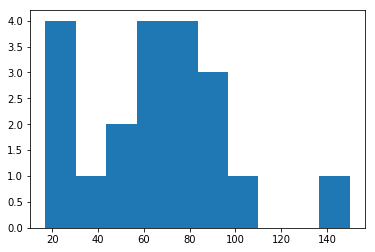

In [14]:
plt.hist(salary)
plt.show()

### Задание 2

В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?

In [18]:
from math import factorial

In [16]:
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

#### Вероятность вытащить из 1 ящика 0 белых а из второго 3 белых

$$P_{03} = \frac{C_{3}^{2} * C_{5}^{0}}{C_{8}^{2}} * \frac{C_{7}^{1} * C_{5}^{3}}{C_{12}^{4}}$$ 

In [19]:
p03 = (combinations(3, 2) * combinations(5, 0) / combinations(8, 2))*(combinations(7, 1) * combinations(5, 3) / combinations(12, 4))
p03

0.01515151515151515

#### Вероятность вытащить из 1 ящика 1 белый а из второго 2 белых

$$P_{12} = \frac{C_{3}^{1} * C_{5}^{1}}{C_{8}^{2}} * \frac{C_{7}^{2} * C_{5}^{2}}{C_{12}^{4}}$$ 

In [21]:
p12 = (combinations(3, 1) * combinations(5, 1) / combinations(8, 2))*(combinations(7, 2) * combinations(5, 2) / combinations(12, 4))
p12

0.22727272727272727

#### Вероятность вытащить из 1 ящика 2 белых а из второго 1 белый

$$P_{21} = \frac{C_{3}^{0} * C_{5}^{2}}{C_{8}^{2}} * \frac{C_{7}^{3} * C_{5}^{1}}{C_{12}^{4}}$$ 

In [22]:
p21 = (combinations(3, 0) * combinations(5, 2) / combinations(8, 2))*(combinations(7, 3) * combinations(5, 1) / combinations(12, 4))
p21

0.12626262626262627

$$P = P_{03} + P_{12} + P_{21}$$

In [23]:
p = p03 + p12 + p21
p

0.3686868686868687

### Задание 3

На соревновании по биатлону один из трех спортсменов стреляет и попадает в мишень. Вероятность попадания для первого спортсмена равна 0.9, для второго — 0.8, для третьего — 0.6. Найти вероятность того, что выстрел произведен: a). первым спортсменом б). вторым спортсменом в). третьим спортсменом.

#### Вероятность полной группы событий

$$P(A) = P(B_1) \cdot P(A\:|\:B_1) + P(B_2) \cdot P(A\:|\:B_2) \; + P(B_3) \cdot P(A\:|\:B_3)$$

In [26]:
p = 0.9 * (1/3) + 0.8 * (1/3) + 0.6 * (1/3)
p

0.7666666666666666

#### Апостериорная вероятность для первого спортстмена

$$P(B_1\:|\:A) = \frac{P(B_1) \cdot P(A\:|\:B_1)}{P(A)}$$

In [28]:
p1 = 0.9 * (1/3) / p
p1

0.391304347826087

#### Апостериорная вероятность для второго спортстмена

$$P(B_2\:|\:A) = \frac{P(B_2) \cdot P(A\:|\:B_2)}{P(A)}$$

In [30]:
p2 = 0.8 * (1/3) / p
p2

0.3478260869565218

#### Апостериорная вероятность для третьего спортстмена

$$P(B_3\:|\:A) = \frac{P(B_3) \cdot P(A\:|\:B_3)}{P(A)}$$

In [31]:
p3 = 0.6 * (1/3) / p
p3

0.2608695652173913

### Задание 4

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?

#### Вероятность полной группы событий

$$P(A) = P(B_1) \cdot P(A\:|\:B_1) + P(B_2) \cdot P(A\:|\:B_2) \; + P(B_3) \cdot P(A\:|\:B_3)$$

In [37]:
p = 0.8 * (1/4) + 0.7 * (1/4) + 0.9 * (1/2)
p

0.825

#### Апостериорная вероятность для факультета A

$$P(B_1\:|\:A) = \frac{P(B_1) \cdot P(A\:|\:B_1)}{P(A)}$$

In [38]:
p1 = 0.8 * (1/4) / p
p1

0.24242424242424246

#### Апостериорная вероятность для факультета B

$$P(B_2\:|\:A) = \frac{P(B_2) \cdot P(A\:|\:B_2)}{P(A)}$$

In [39]:
p2 = 0.7 * (1/4) / p
p2

0.21212121212121213

#### Апостериорная вероятность для факультета C

$$P(B_3\:|\:A) = \frac{P(B_3) \cdot P(A\:|\:B_3)}{P(A)}$$

In [41]:
p3 = 0.9 * (1/2) / p
p3

0.5454545454545455

### Задание 5

Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?

In [46]:
pa = 0.1 * 0.2 * 0.25
pa

0.005000000000000001

In [47]:
pb = 0.1 * 0.2 * 0.75 + 0.9 * 0.2 * 0.25 + 0.1 * 0.8 * 0.25
pb

0.08000000000000002

In [48]:
pc = 1 - 0.9 * 0.8 * 0.75
pc

0.45999999999999996

In [49]:
pd = (0.9 * 0.8 * 0.25 + 0.1 * 0.8 * 0.75 + 0.9 * 0.2 * 0.75) * pb
pd

0.03000000000000001